In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(filepath_or_buffer='rome_listings_cleaned.csv')
# Convert boolean columns into int
bool_columns = [c for c in df.columns if df[c].dtype == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [3]:
# Create an instance of LabelEncoder
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
label_encoder_3 = LabelEncoder()



# Fit and transform the neighborhood column
df['neighbourhood_cleansed'] = label_encoder_1.fit_transform(df['neighbourhood_cleansed'])
df['room_type'] = label_encoder_2.fit_transform(df['room_type'])
df['property_type'] = label_encoder_3.fit_transform(df['property_type'])


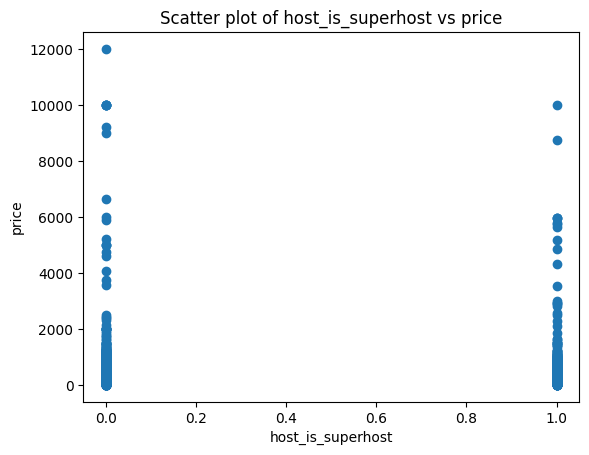

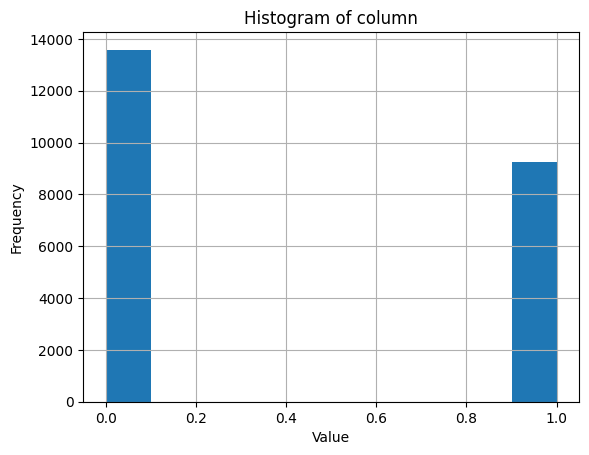

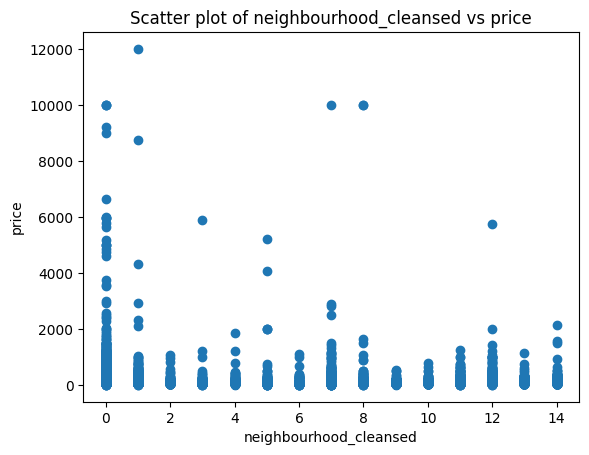

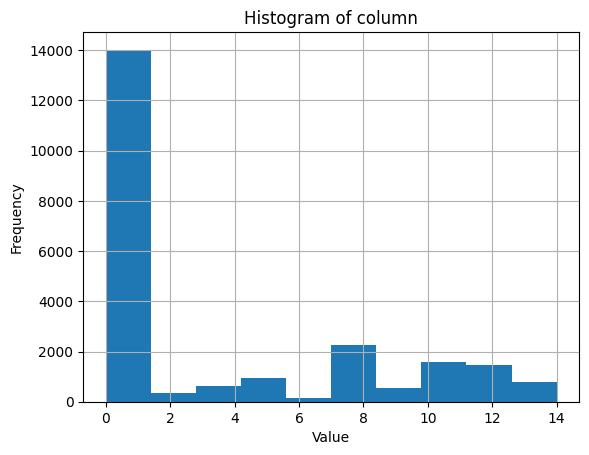

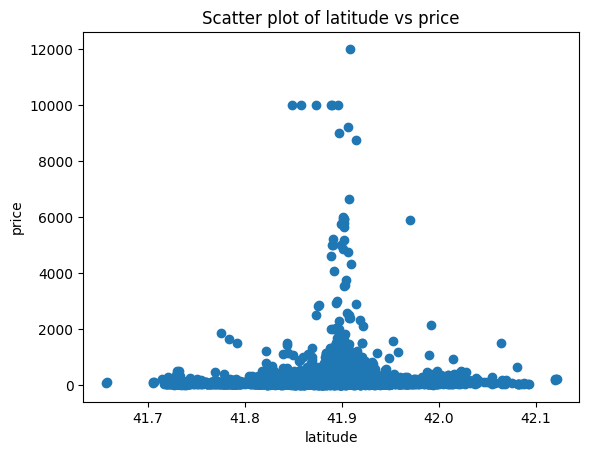

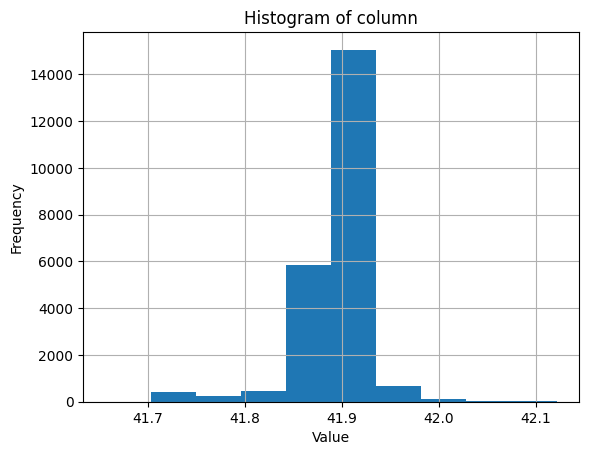

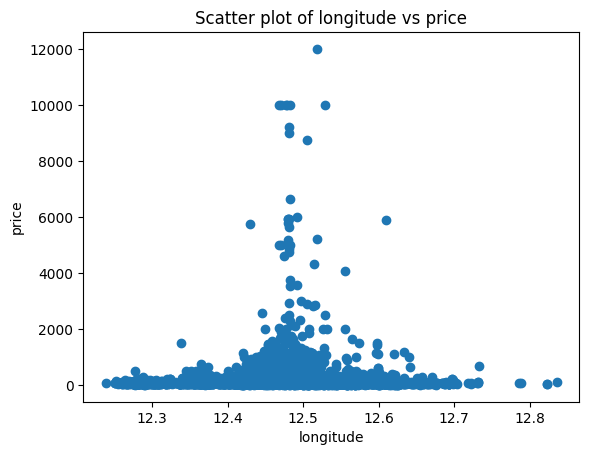

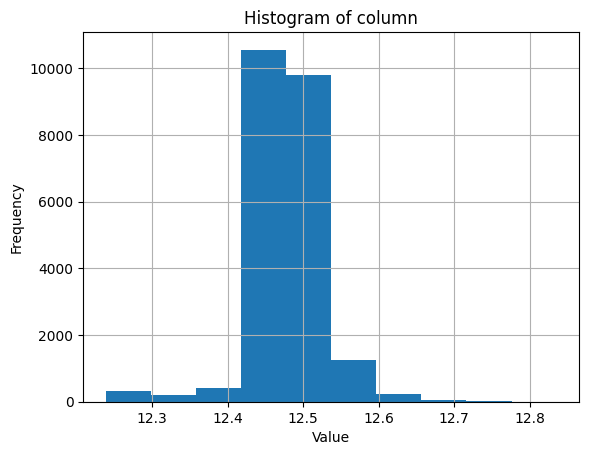

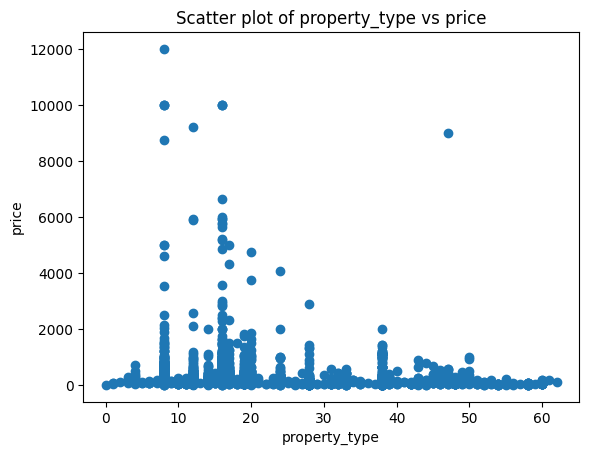

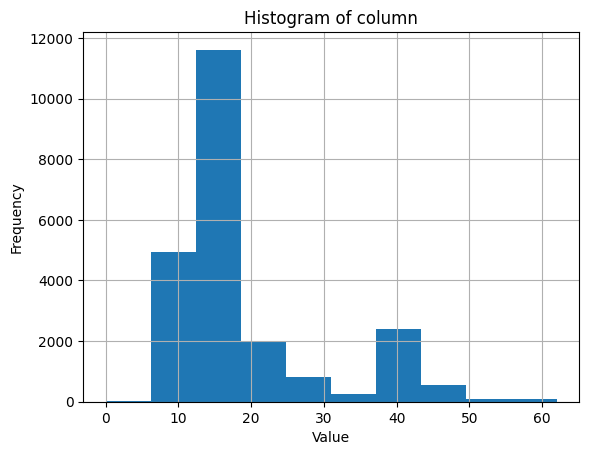

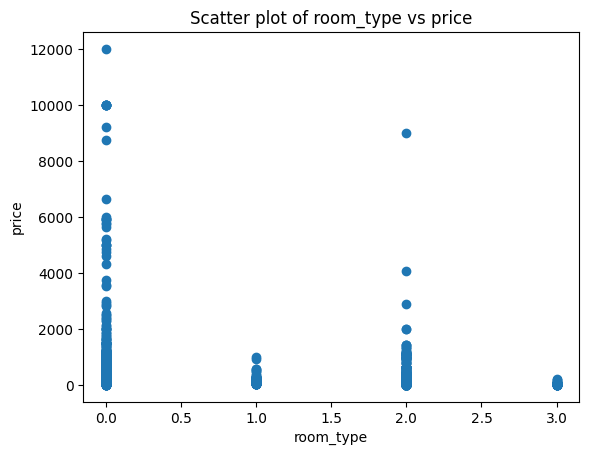

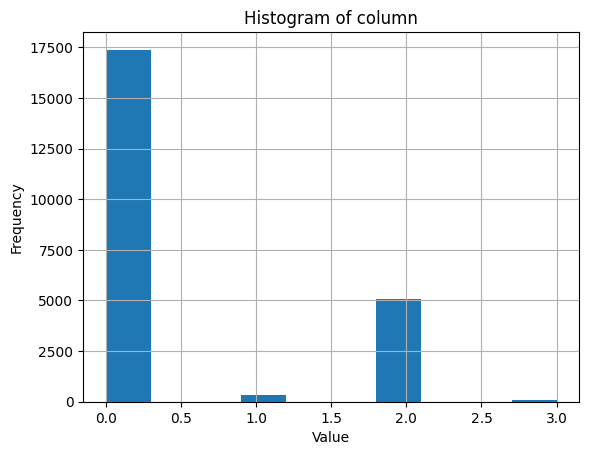

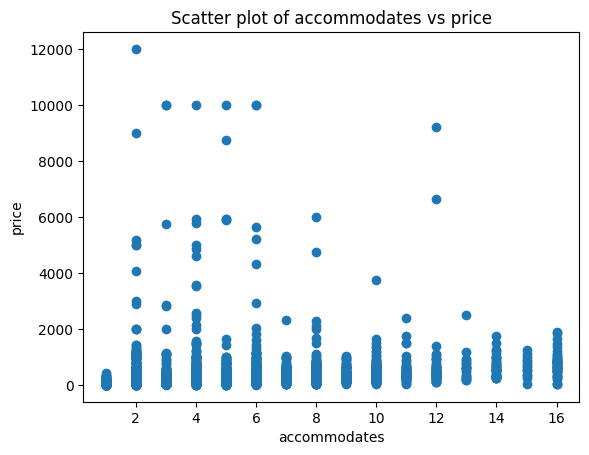

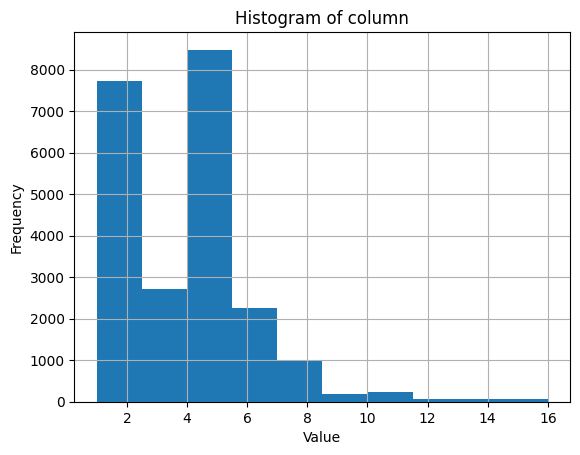

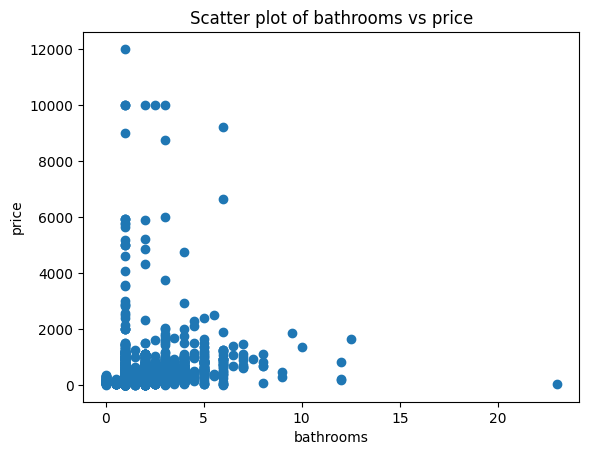

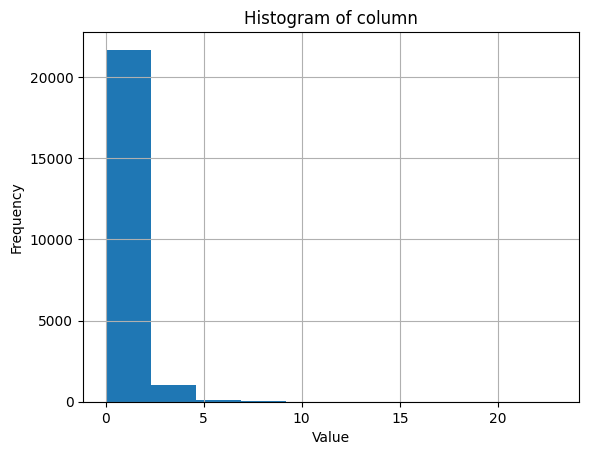

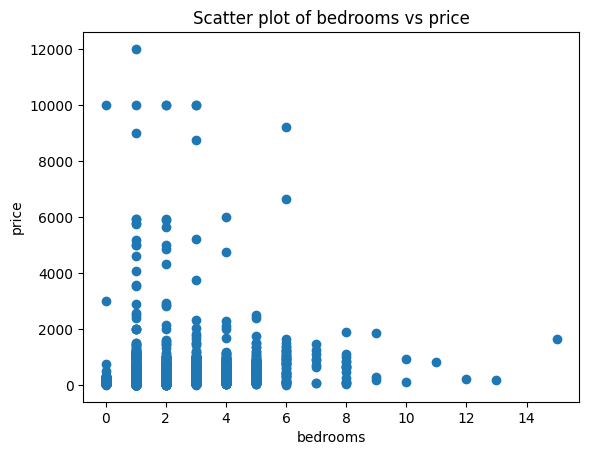

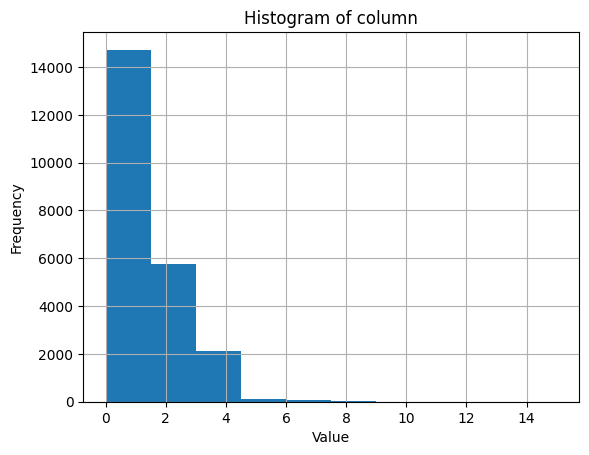

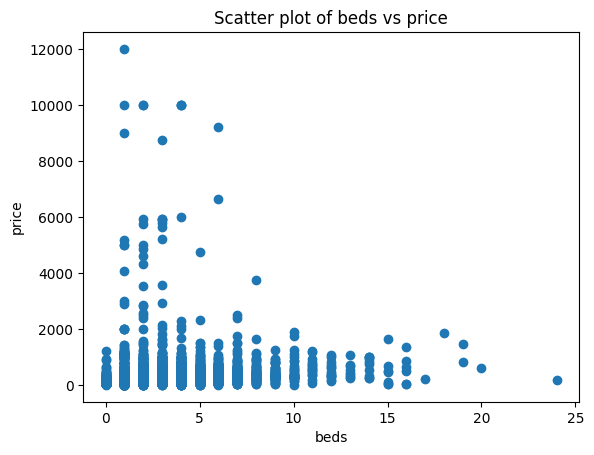

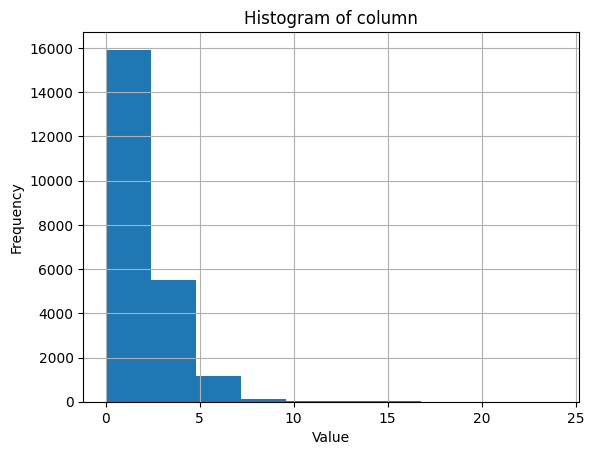

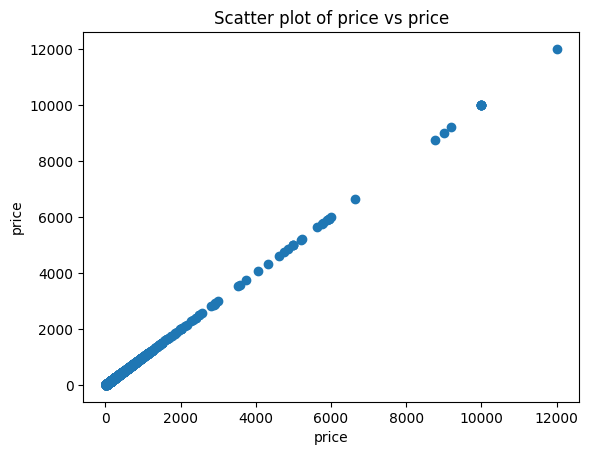

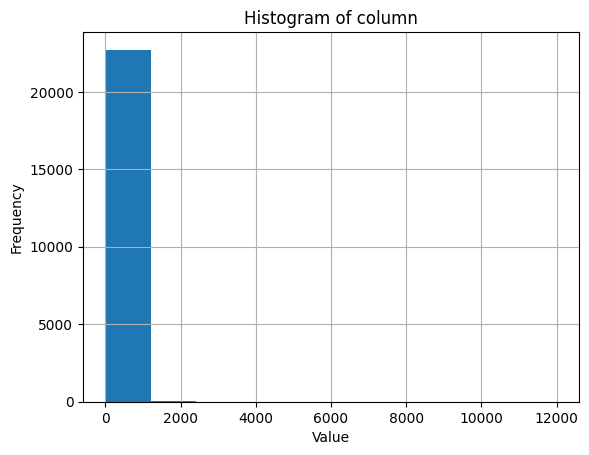

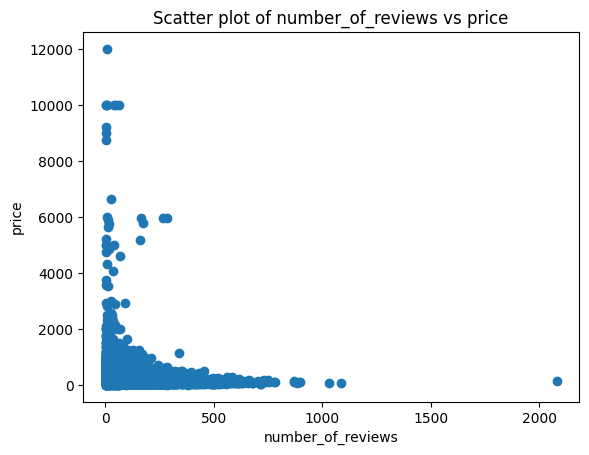

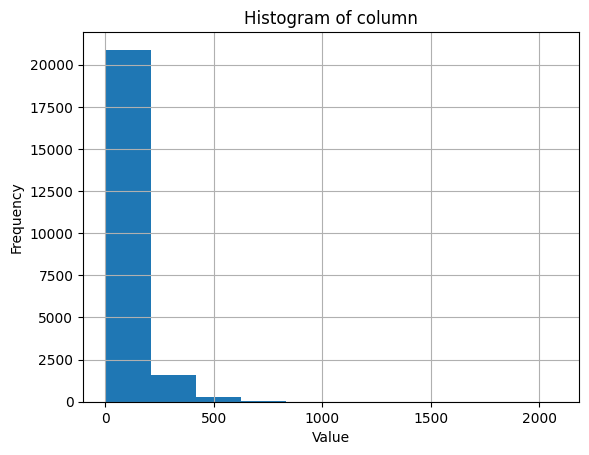

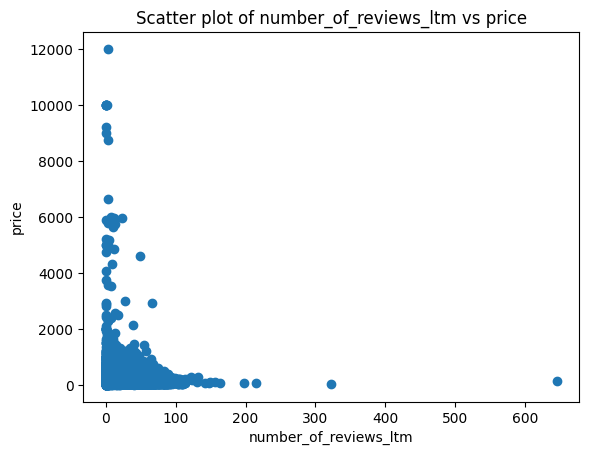

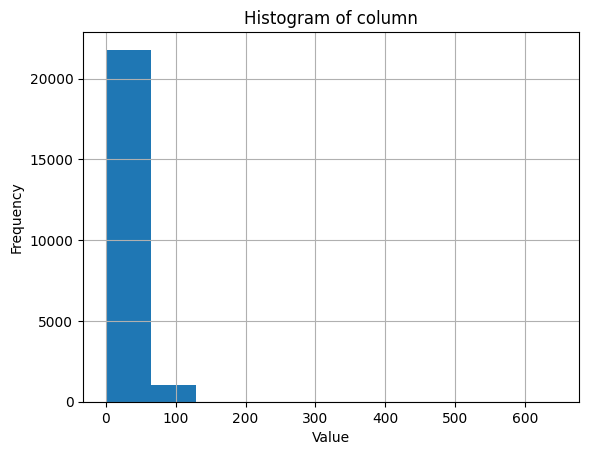

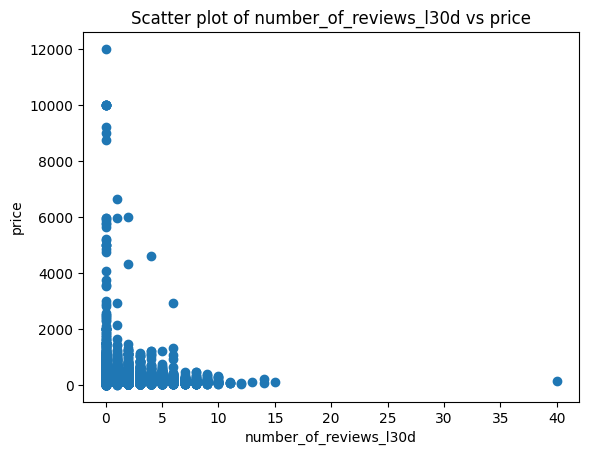

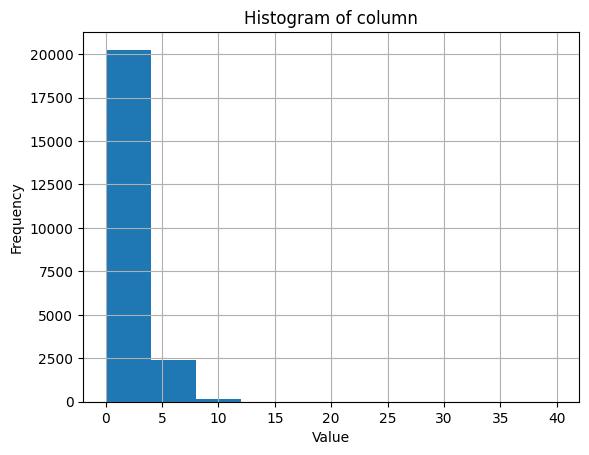

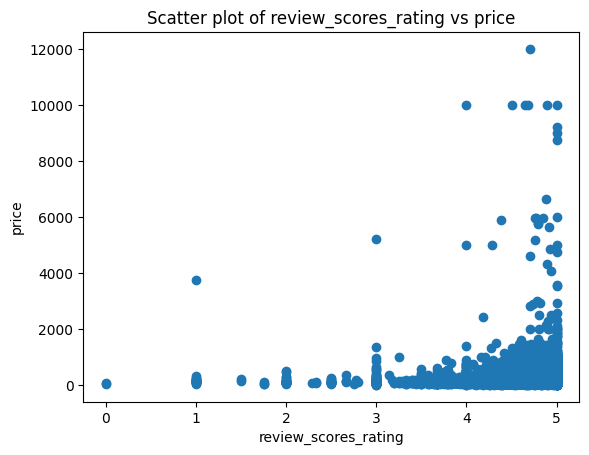

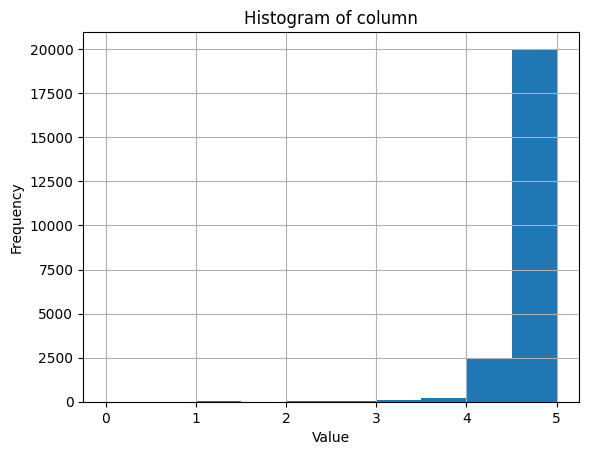

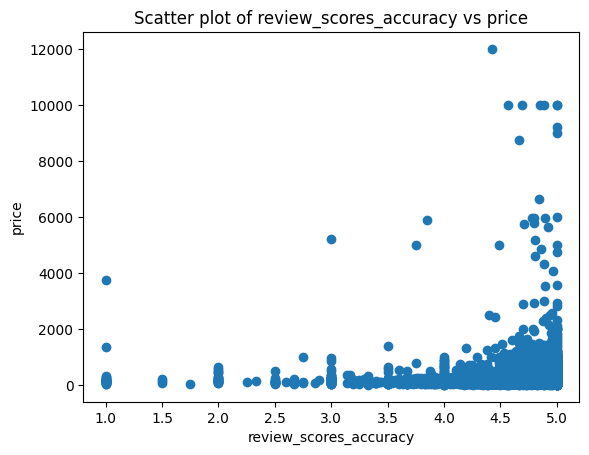

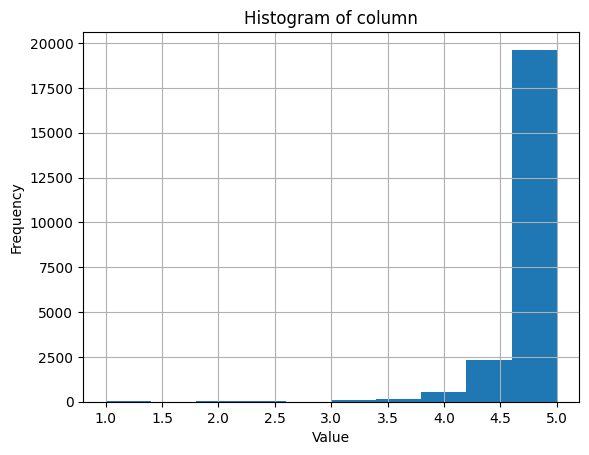

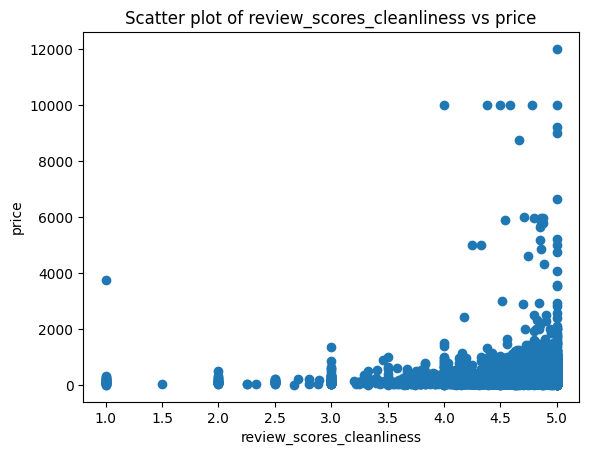

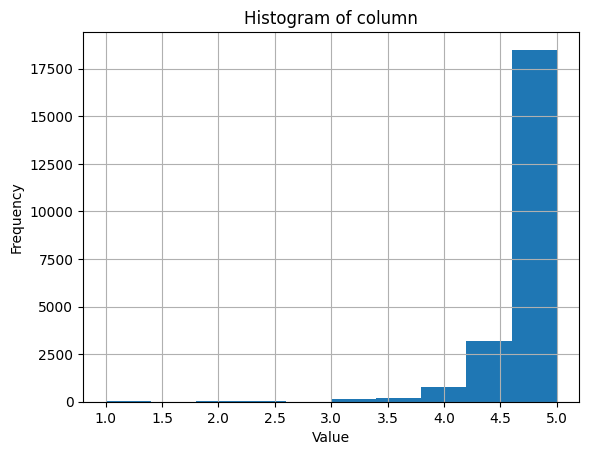

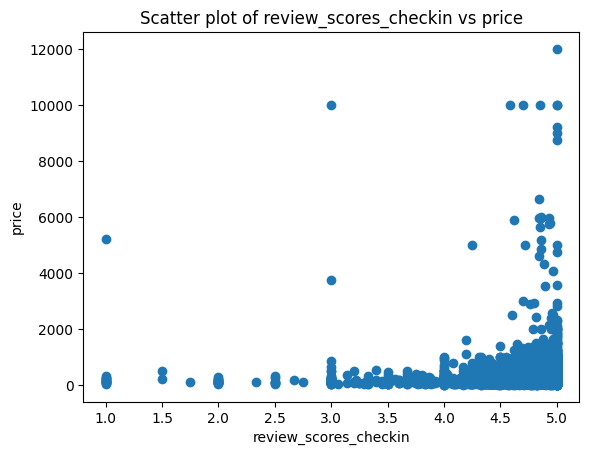

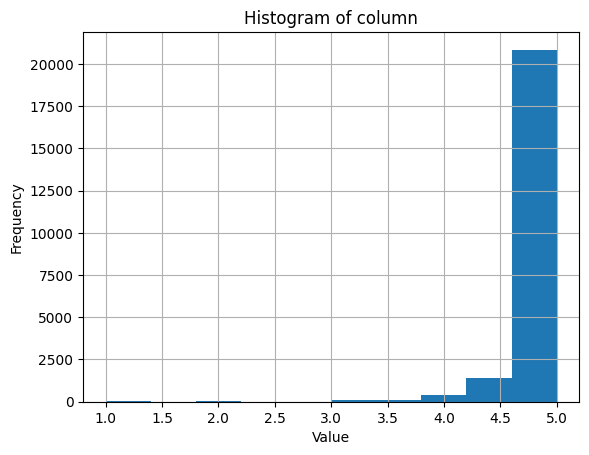

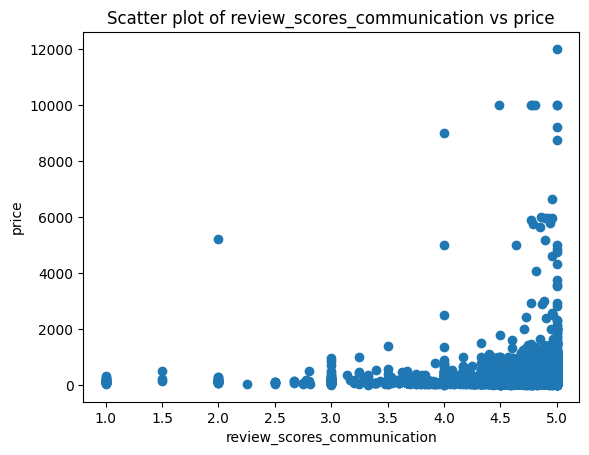

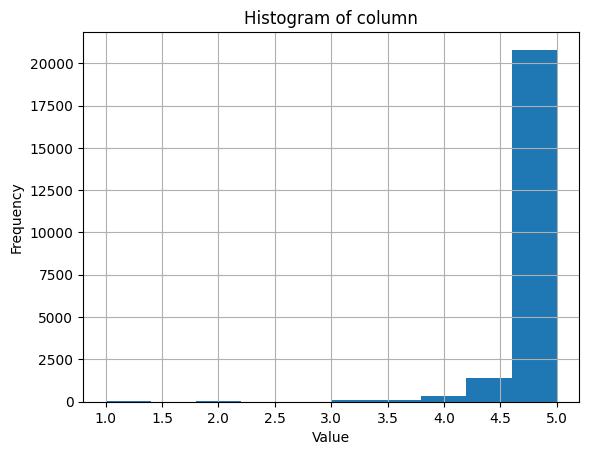

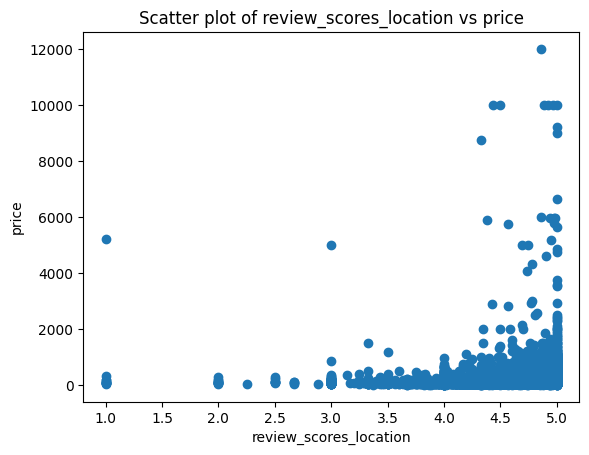

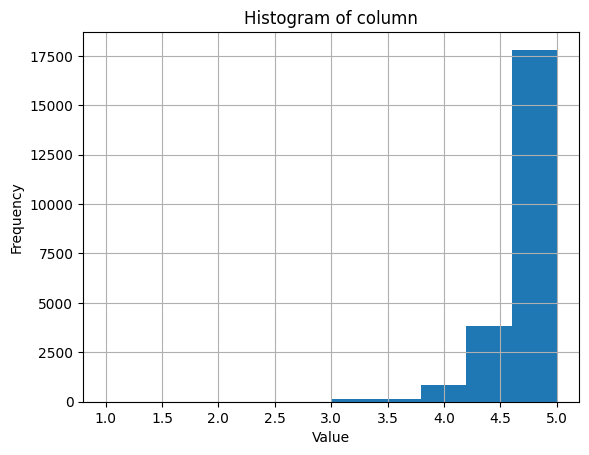

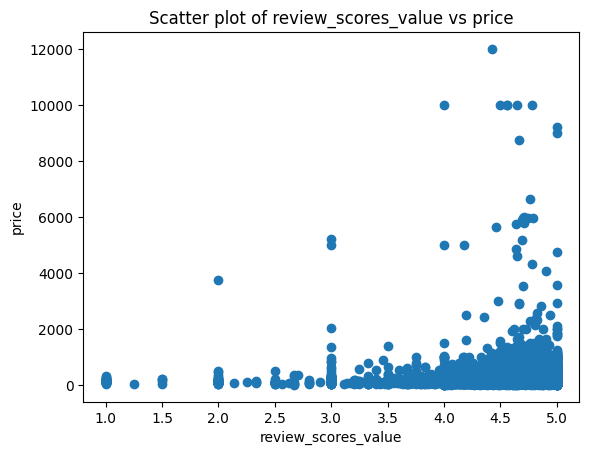

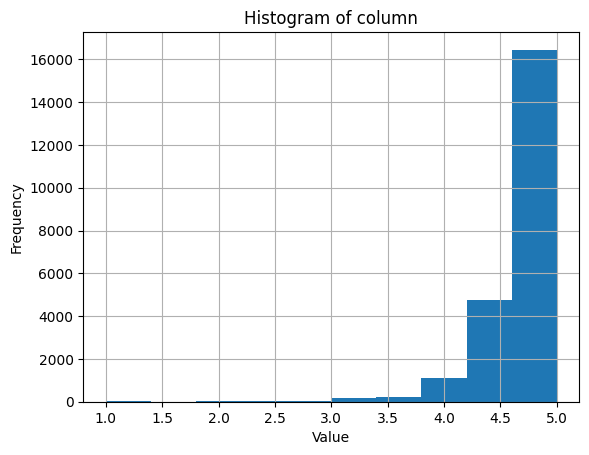

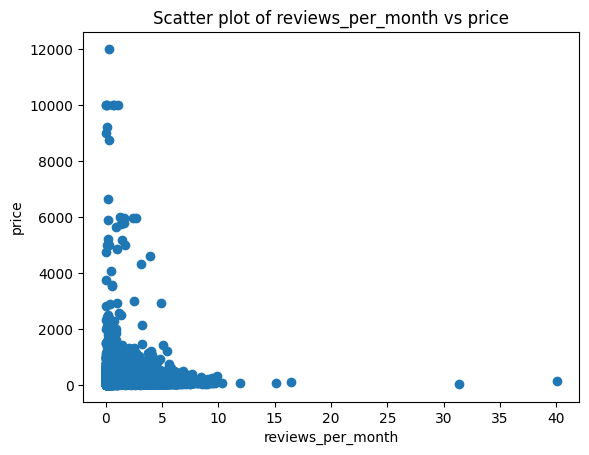

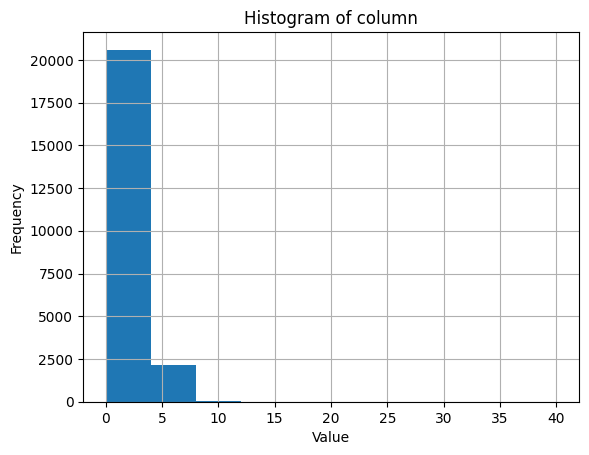

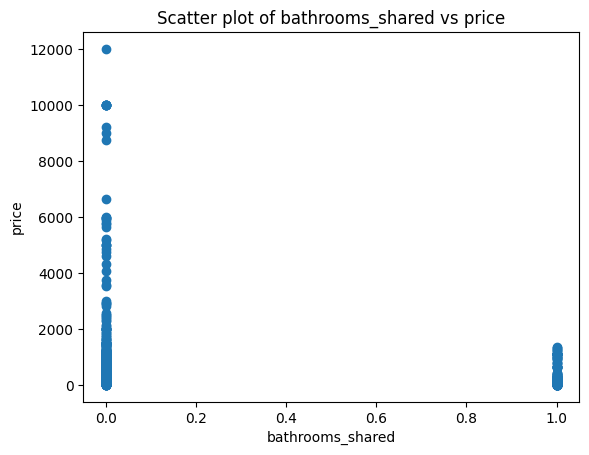

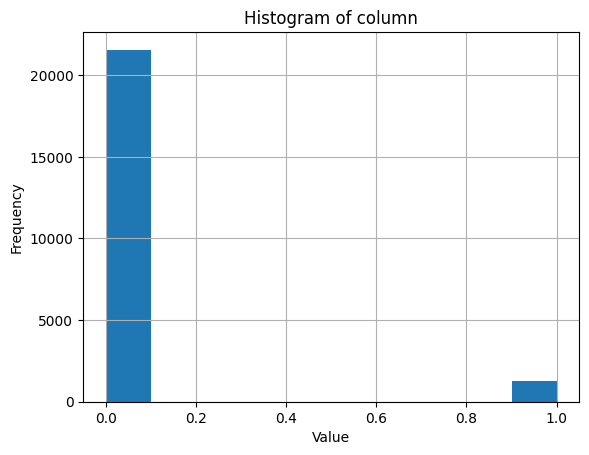

In [4]:
# Iterate over each column in the dataframe
for column in df.columns:
    plt.figure()
    # Create scatter plot
    plt.scatter(df[column], df['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'Scatter plot of {column} vs price')
    
    plt.figure()
    df[column].hist()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of column')
    plt.show()

In [5]:
to_drop = ['host_is_superhost', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
           'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month']
df.drop(columns=to_drop, inplace=True)

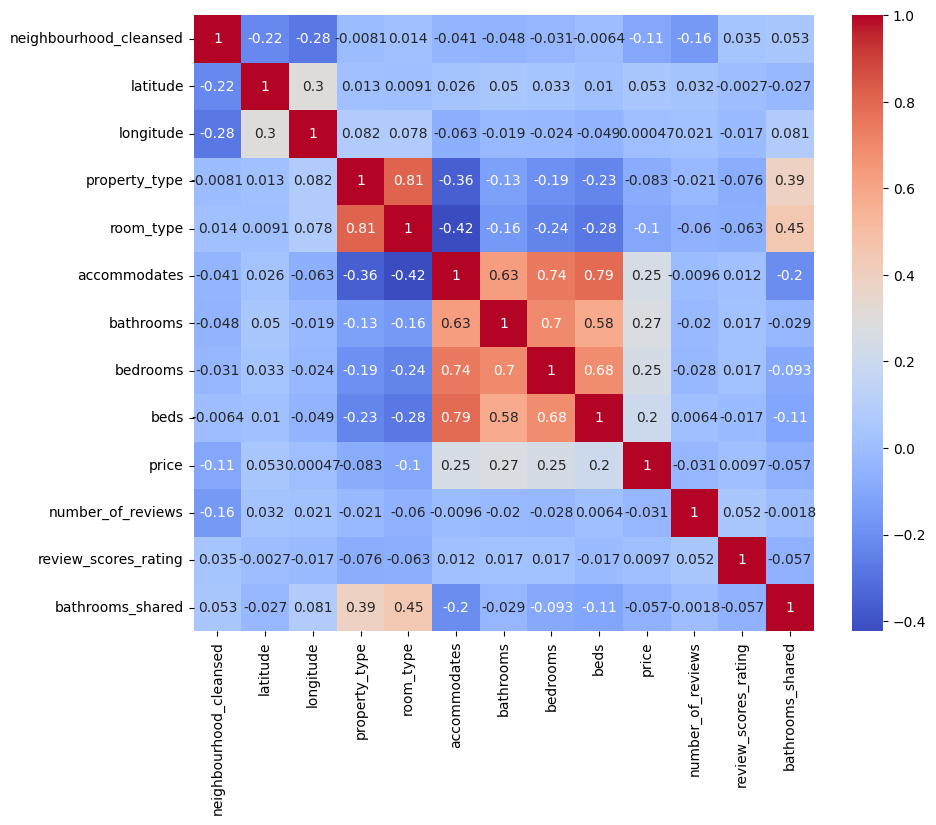

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with price
correlation_with_price = correlation_matrix['price']

# Sort the correlation values in descending order
sorted_correlation = correlation_with_price.sort_values(ascending=False)

# Get the features and their correlation with price
features = sorted_correlation.index.tolist()

# Print the features and their correlation with price
print(features)

['price', 'bathrooms', 'accommodates', 'bedrooms', 'beds', 'latitude', 'review_scores_rating', 'longitude', 'number_of_reviews', 'bathrooms_shared', 'property_type', 'room_type', 'neighbourhood_cleansed']


In [16]:
import folium.plugins

# Create a map centered around the mean latitude and longitude
map_heat = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Create a HeatMap layer using latitude, longitude, and price
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]
heat_map = folium.plugins.HeatMap(heat_data)

# Display the map
map_heat.save('heatmap.html')

In [18]:
df = pd.read_csv(filepath_or_buffer='rome_listings_cleaned.csv')
df.drop(columns=['latitude', 'longitude', 'review_scores_rating', 'number_of_reviews'], inplace=True)
df.to_csv('rome_listings_aftereda.csv', index=False)